<a href="https://colab.research.google.com/github/maritamayo25/Business-Analytics/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Instalación de los paquetes para el Análisis de Sentimientos. En donde la pregunta de Análisis es ¿como está el discurso politico en Venezuela desde el año 2021 hasta el año 2024?

In [ ]:
!pip install -U spacy  #Es el tokenizador Análisis de Sentimientos
!spacy download es_core_news_lg  #Diccionario en Español
!spacy download en_core_web_sm  #Diccionario en Ingles

!pip install vaderSentiment
!pip install wordcloud

!pip uninstall numpy
!pip install numpy==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's d

1.Se procede con la carga de las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt') #Optimizador de la maquina
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #Analizador de sentimientos
from nltk.tokenize import word_tokenize,sent_tokenize  #Tokenizador de oraciones

from textblob import TextBlob #Traductor de textos

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2.Se cargan los documentos de análisis 2021

In [ ]:
#Se procede con la lectura de los documentos
nxl1=open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2021 .txt').read()
nxl_tk1=sent_tokenize(nxl1)
print(nxl_tk1[:5])

['\ufeffQuiero saludar, en el inicio de las sesiones de la Asamblea General Anual, a todos los países de la Organización de Naciones Unidas.', 'Saludar a los pueblos, a los gobiernos de los 194 países que estamos debidamente presentes en esta Asamblea General, en especial al señor Abdulá Chaney, quien ha asumido la presidencia de esta Asamblea General.', 'Les deseo todo el éxito.', 'La Asamblea Anual de la Organización de Naciones Unidas es un evento que nos convoca todos los meses de septiembre de cada año a los jefes de gobierno, a los jefes de Estado, presidentes, primeros ministros y a las más altas autoridades del mundo a debatir nuestras posiciones.', 'A debatir las ideas de un mundo que debe seguir avanzando hacia la construcción de un horizonte multipolar, pluricéntrico, sin hegemonismos imperiales.']


3.Se procede con el análisis de sentimientos 2021

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


I want to greet, at the beginning of the sessions of the Annual General Assembly, to all the countries of the United Nations Organization.
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6597}
Greet the peoples, to the governments of the 194 countries that we are duly present in this General Assembly, especially Mr. Abdulá Chaney, who has assumed the presidency of this General Assembly.
{'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.3182}
I wish you all success.
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.7506}
The Annual Assembly of the United Nations Organization is an event that summons us every month of September of each year to the heads of government, the heads of state, presidents, prime ministers and the highest authorities of the world to discuss our positions .
{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.4215}
To discuss the ideas of a world that must continue to advance towards the construction of a multipolar, multicentric horizon, witho

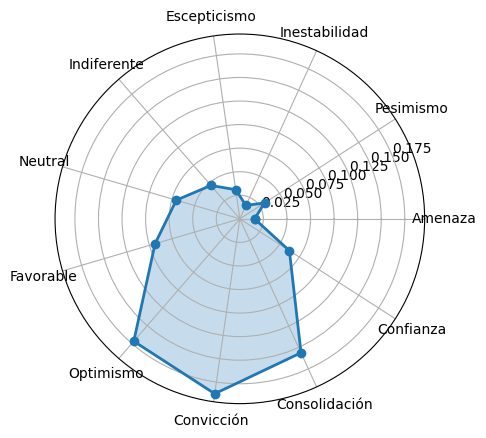

In [ ]:
#Traductor de Textos
from textblob import TextBlob
import textblob.exceptions
#import matplotlib.pyplot as plt
#Se cargan las librerias de análisis de sentimientos
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') #diccionario 70 idiomas
sia=SentimentIntensityAnalyzer()
#----------Contexto 2021-----------------------------------------
XC=np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0])
nXC=np.zeros((11,1))
Xtoks=[];Xpol=[]; pos1=[]

blob=TextBlob(nxl1)
tblob=blob.translate(from_lang='es',to='en')
nxl_tk1=sent_tokenize(str(tblob))

for tokens in nxl_tk1:
  print(tokens)
  scores=sia.polarity_scores(tokens)
  print(scores)
  Xtoks.append(tokens)
  Xpol.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC[pos]=nXC[pos]+1
  pos1.append(pos[0][0])

nXC=nXC/len(nxl_tk1)
nXC[5,]=(nXC[4,]+nXC[6,])/2

#Se crea el informe en un formato Excel - Contexto 2021
dfm=pd.DataFrame(np.column_stack((Xtoks,Xpol,pos1)))
dfm.to_excel('InformeMaduro_2021.xlsx')

#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))

labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza']

plt.figure()
plt.polar(angles,values,'o-',linewidth=2)
plt.fill(angles, values,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()

WORDCLOUD2021

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


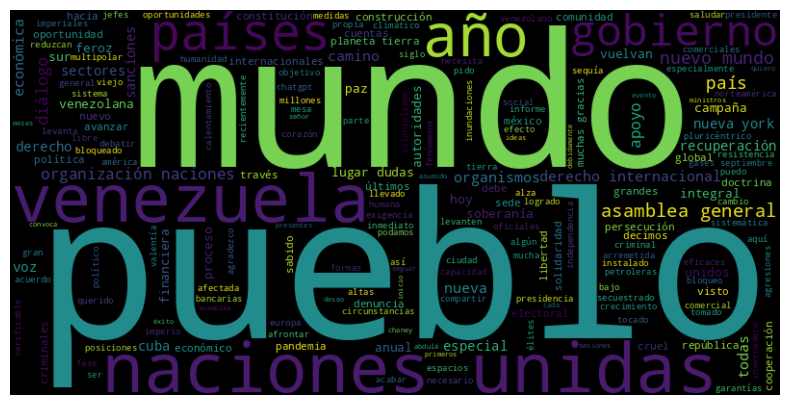

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')  # Download punkt tokenizer
nltk.download('stopwords')  # Download Spanish stop words

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import pos_tag  # Import pos_tag for part-of-speech tagging

# Load the text from your Google Drive (adjust the path)
with open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2021 .txt', 'r', encoding='utf-8') as file:
    texto = file.read()

# Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize words
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words

    return ' '.join(filtered_tokens)

processed_text = preprocess_text(texto)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

4. Se cargan los documentos de análisis 2022

In [ ]:
#Se procede con la lectura de los documentos
nxl2=open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2022.txt').read()
nxl_tk2=sent_tokenize(nxl2)
print(nxl_tk2[:5])

['\ufeffQueridos y queridas compatriotas, está por culminar el año 2022, y quiero aprovechar estos momentos para reconocerte a ti, hombre y mujer de esta tierra, por el esfuerzo, por la perseverancia demostrados durante este año en el que empezamos ya a recoger los frutos de un trabajo colectivo.', 'Estoy seguro que las pruebas superadas en estos últimos doce meses quedarán escritas en la historia como el inicio de la recuperación definitiva de nuestra patria.', 'No fueron sencillas ni modestas las metas que nos trazamos para el año 2022, porque estábamos conscientes de que comenzaba una nueva época de cambios sustantivos en el mundo y particularmente en el alma nacional.', 'Por eso redoblamos el paso cambiando las fórmulas, los métodos, sin miedo a lo nuevo y asumiendo como gran objetivo el renacimiento nacional.', 'Fueron seis líneas de trabajo trazadas con detalle para encarar la transición de esta nueva época que nos reclama con coraje y audacia la creación y el vencimiento de las 

5.Se procede con el análisis de sentimientos 2022

Dear and dear compatriots, it is about to culminate the year 2022, and I want to take advantage of these moments to recognize you, man and wife of this land, for the effort, for the perseverance demonstrated during this year in which we begin to collect the fruits of a collective work.
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.7579}
I am sure that the evidence surpassed in these last twelve months will be written in history as the beginning of the definitive recovery of our homeland.
{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'compound': 0.3182}
The goals that we traced by 2022 were not simple or modest, because we were aware that a new era of substantive changes in the world began and particularly in the national soul.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
That is why we redouble the step by changing the formulas, the methods, without fear of the new and assuming as a great objective the national rebirth.
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 

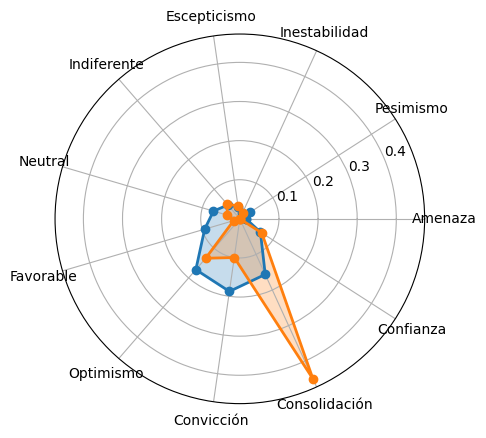

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
nXC2=np.zeros((11,1))
Xtoks2=[];Xpol2=[]; pos2=[]

blob2=TextBlob(nxl2)
tblob=blob2.translate(from_lang='es',to='en')
nxl_tk2=sent_tokenize(str(tblob))

for tokens2 in nxl_tk2:
  print(tokens2)
  scores=sia.polarity_scores(tokens2)
  print(scores)
  Xtoks2.append(tokens2)
  Xpol2.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC2[pos]=nXC2[pos]+1
  pos2.append(pos[0][0])

nXC2=nXC2/len(nxl_tk2)
nXC2[5,]=(nXC2[4,]+nXC2[6,])/2

#Se crea el informe en un formato Excel - Contexto 2021
dfm2=pd.DataFrame(np.column_stack((Xtoks2,Xpol2,pos2)))
dfm2.to_excel('InformeMaduro_2022.xlsx')

#Se procede con la construcción del gráfico Spider Plot
angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))
values2=np.concatenate((nXC2,[nXC2[0]]))
labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza' ]
import matplotlib.pyplot as plt


plt.polar(angles,values, 'o-', linewidth=2)
plt.polar(angles,values2, 'o-', linewidth=2)
plt.fill(angles,values,alpha=0.25)
plt.fill(angles,values2,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()
plt.figure()


WORDCLOUD2022

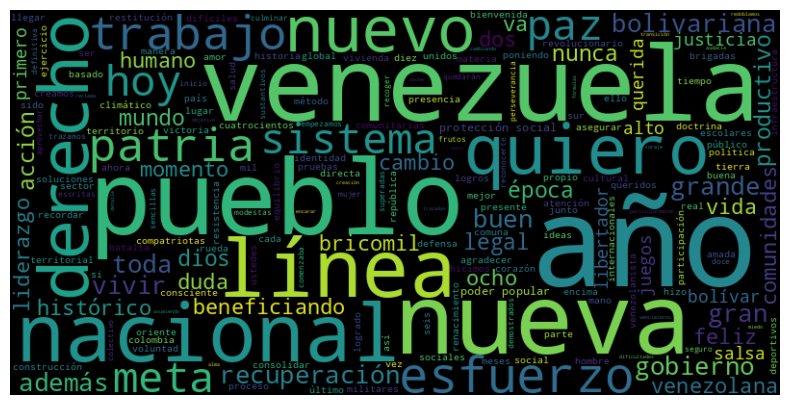

In [ ]:
with open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2022.txt', 'r', encoding='utf-8') as file:
    texto2 = file.read()

# Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize words
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    # Filter for nouns and adjectives (adjust parts of speech as needed)

    # Optional: Apply stemming or lemmatization (e.g., using PorterStemmer or WordNetLemmatizer)
    # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(filtered_tokens)

processed_text = preprocess_text(texto2)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

6. Se cargan los documentos de análisis 2023

In [ ]:
#Se procede con la lectura de los documentos
nxl3=open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2023.txt').read()
nxl_tk3=sent_tokenize(nxl3)
print(nxl_tk3[:5])

['\ufeffEs muy importante dejar sentado, escrito, profesor Pedro Calzadilla, usted que es historiador, un hombre que le toca escribir la historia y ahora le toca hacer la historia, historiadores e historiadoras de Venezuela y de América Latina, dejar sentado que, en una batalla bravía, Venezuela ha sabido defender y hacer cumplir su Constitución.', 'Y se lo decía en estos días a Brian Nichols, que se está haciendo millonario con los tweets que lanza sobre Venezuela.', 'Señor Canciller Iván Gil, porque usted sabe que es un gran negocio sacar tweets sobre Venezuela, señor Bryan Nichols, presidente Joe Biden debería saberlo, que su funcionario se hace millonario cobrando lobbies, sacando tweets todos los días sobre Venezuela.', 'Más que una posición ideológica, es un negocio hacer esas cosas contra la República Bolivariana de Venezuela.', 'Y yo se lo decía a Brian Nichols, que se está haciendo millonario, y mientras más los nombra, más sube su cuenta, más se cotiza.']


7.Se procede con el análisis de sentimientos 2023

It is very important to leave, written, professor Pedro Calzadilla, you who is a historian, a man who has to write the story and now he has to make the story, historians and historians of Venezuela and Latin America, let him sit that, in a Batalla Bravía, Venezuela has managed to defend and enforce its constitution.
{'neg': 0.027, 'neu': 0.935, 'pos': 0.038, 'compound': 0.1604}
And Brian Nichols told these days, who is becoming a millionaire with the tweets he launches on Venezuela.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Mr. Chancellor Iván Gil, because you know it is a big business to get tweets on Venezuela, Mr. Bryan Nichols, President Joe Biden should know, that your official becomes a millionaire charging lobbies, taking tweets every day on Venezuela.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
More than an ideological position, it is a business to do those things against the Bolivarian Republic of Venezuela.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound'

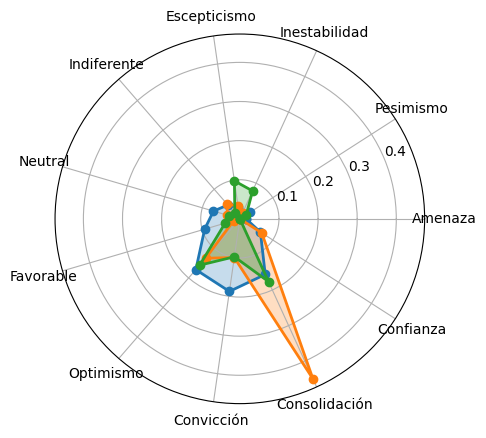

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
nXC3=np.zeros((11,1))
Xtoks3=[];Xpol3=[]; pos3=[]

blob3=TextBlob(nxl3)
tblob=blob3.translate(from_lang='es',to='en')
nxl_tk3=sent_tokenize(str(tblob))

for tokens3 in nxl_tk3:
  print(tokens3)
  scores=sia.polarity_scores(tokens3)
  print(scores)
  Xtoks3.append(tokens3)
  Xpol3.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC3[pos]=nXC3[pos]+1
  pos3.append(pos[0][0])

nXC3=nXC3/len(nxl_tk3)
nXC3[5,]=(nXC3[4,]+nXC3[6,])/2

#Se crea el informe en un formato Excel - Contexto 2021
dfm3=pd.DataFrame(np.column_stack((Xtoks3,Xpol3,pos3)))
dfm3.to_excel('InformeMaduro_2023.xlsx')

#Se procede con la construcción del gráfico Spider Plot

angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))
values2=np.concatenate((nXC2,[nXC2[0]]))
values3=np.concatenate((nXC3,[nXC3[0]]))
labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza' ]
import matplotlib.pyplot as plt


plt.polar(angles,values, 'o-', linewidth=2)
plt.polar(angles,values2, 'o-', linewidth=2)
plt.polar(angles,values3, 'o-', linewidth=2)
plt.fill(angles,values,alpha=0.25)
plt.fill(angles,values2,alpha=0.25)
plt.fill(angles,values3,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()
plt.figure()

WORDCLOUD2023

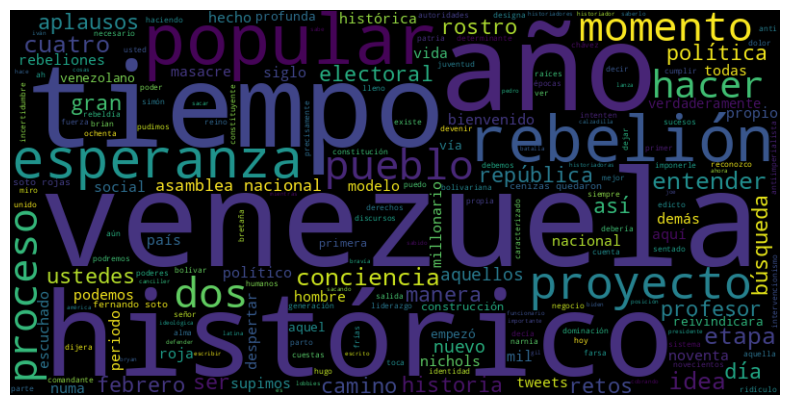

In [ ]:
with open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2023.txt', 'r', encoding='utf-8') as file:
    texto3 = file.read()

# Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize words
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    # Filter for nouns and adjectives (adjust parts of speech as needed)

    # Optional: Apply stemming or lemmatization (e.g., using PorterStemmer or WordNetLemmatizer)
    # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(filtered_tokens)

processed_text = preprocess_text(texto3)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

8.Se cargan los documentos de análisis 2024

In [ ]:
#Se procede con la lectura de los documentos
nxl4=open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2024 .txt').read()
nxl_tk4=sent_tokenize(nxl4)
print(nxl_tk4[:5])

['\ufeffY damos la palabra para el presidente de la República Bolivariana de Venezuela.', 'Señor, de elementos de aporte que he tomado nota en esta búsqueda permanente de verdad, que esto es un diálogo muy enriquecedor, y ha habido un conjunto de elementos de aporte que he tomado nota en esta búsqueda permanente.', 'Construir lo que ha sido una bandera histórica de los últimos 70, 80 años, la humanidad.', 'Construir un nuevo orden internacional.', 'Felicito, señor presidente Putin, por el carácter incluyente, convocante, unitario del liderazgo que ha ejercido Rusia para la organización de esta exitosa cumbre.']


9.Se procede con el análisis de sentimientos 2024

And we give the floor for the President of the Bolivarian Republic of Venezuela.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Lord, of contribution elements that I have taken note in this permanent search for truth, that this is a very enriching dialogue, and there has been a set of contribution elements that I have taken note in this permanent search.
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.3182}
Build what has been a historical flag of the last 70, 80 years, humanity.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Build a new international order.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I congratulate, Mr. President Putin, for the inclusive, convening, unitary character of the leadership that Russia has exercised for the organization of this successful summit.
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.8271}
Venezuela has participated in a modest way, in all its instances, in all its ministerial, technical, political, diplomatic

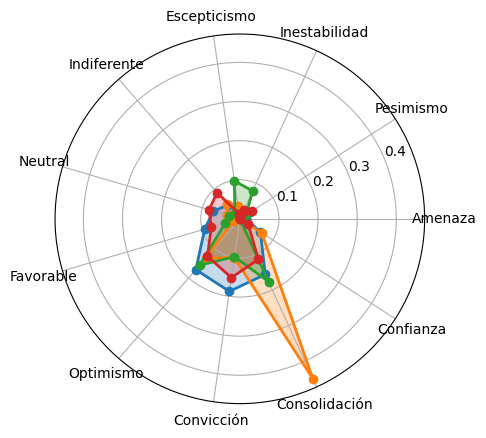

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
nXC4=np.zeros((11,1))
Xtoks4=[];Xpol4=[]; pos4=[]

blob4=TextBlob(nxl4)
tblob=blob4.translate(from_lang='es',to='en')
nxl_tk4=sent_tokenize(str(tblob))

for tokens4 in nxl_tk4:
  print(tokens4)
  scores=sia.polarity_scores(tokens4)
  print(scores)
  Xtoks4.append(tokens4)
  Xpol4.append(scores['compound'])
  polarity=scores['compound']

  d=np.abs(XC-polarity)
  pos=np.where(d==min(d))
  nXC4[pos]=nXC4[pos]+1
  pos4.append(pos[0][0])

nXC4=nXC4/len(nxl_tk4)
nXC4[5,]=(nXC4[4,]+nXC4[6,])/2

#Se crea el informe en un formato Excel - Contexto 2023
dfm4=pd.DataFrame(np.column_stack((Xtoks4,Xpol4,pos4)))
dfm4.to_excel('InformeMaduro_2024.xlsx')

#Se procede con la construcción del gráfico Spider Plot

angles=np.linspace(0,2*np.pi,11,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
values=np.concatenate((nXC,[nXC[0]]))
values2=np.concatenate((nXC2,[nXC2[0]]))
values3=np.concatenate((nXC3,[nXC3[0]]))
values4=np.concatenate((nXC4,[nXC4[0]]))
labels=['Amenaza', 'Pesimismo', 'Inestabilidad', 'Escepticismo', 'Indiferente', 'Neutral', 'Favorable', 'Optimismo', 'Convicción', 'Consolidación', 'Confianza' ]
import matplotlib.pyplot as plt


plt.polar(angles,values, 'o-', linewidth=2)
plt.polar(angles,values2, 'o-', linewidth=2)
plt.polar(angles,values3, 'o-', linewidth=2)
plt.polar(angles,values4, 'o-', linewidth=2)
plt.fill(angles,values,alpha=0.25)
plt.fill(angles,values2,alpha=0.25)
plt.fill(angles,values3,alpha=0.25)
plt.fill(angles,values4,alpha=0.25)
plt.thetagrids(angles[:-1]*180/np.pi,labels)
plt.show()
plt.figure()

WORDCLOUD2024

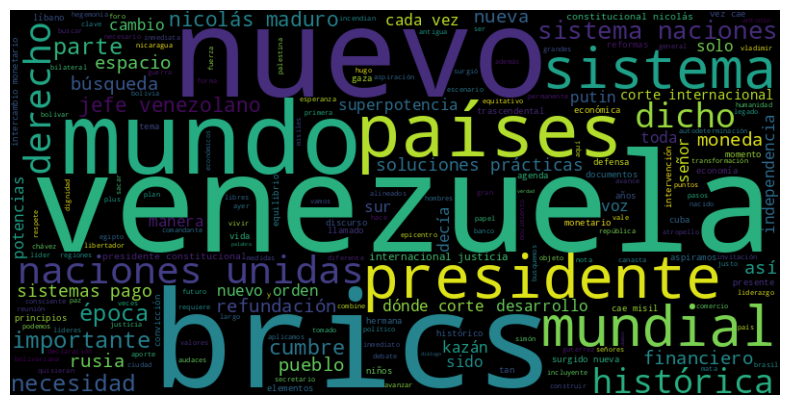

In [ ]:
with open('/content/drive/MyDrive/Analitica de negocios/Discurso Maduro 2024 .txt', 'r', encoding='utf-8') as file:
    texto4 = file.read()

# Preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)  # Tokenize words
    stop_words = set(stopwords.words('spanish'))
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    # Filter for nouns and adjectives (adjust parts of speech as needed)

    # Optional: Apply stemming or lemmatization (e.g., using PorterStemmer or WordNetLemmatizer)
    # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(filtered_tokens)

processed_text = preprocess_text(texto4)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()